In [110]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random
import matplotlib.dates as mdates

In [111]:
def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h) - 3, int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

class Person:
    """
    Class to represent each individal poutfit being recorded during Deployment, made up of garments.
    """
    def __init__(
        self, wet:bool, Name:str, color:str,
        backneck:str,   back:str,        chest:str, 
        leftab:str,     rightab:str, 
        rightuparm:str, rightlowarm:str, 
        leftuparm:str,  leftlowarm:str, 
        beanie1:str,    beanie2:str,     beanie3:str, beanieR:str, beanieL:str
    ):
        self.Backneck    = backneck        # Tag ID's for the shirt
        self.Back        = back
        self.Chest       = chest
        self.Leftab      = leftab
        self.Rightab     = rightab
        self.Rightuparm  = rightuparm
        self.Rightlowarm = rightlowarm
        self.Leftuparm   = leftuparm
        self.Leftlowarm  = leftlowarm
        self.Beanie1     = beanie1         # Tag ID's for the beanies
        self.Beanie2     = beanie2
        self.Beanie3     = beanie3
        self.BeanieR     = beanieR
        self.BeanieL     = beanieL

        self.Name = Name                   # Soldier's Name

        self.ShirtMapping = {
            self.Backneck:    Name + " Back Neck",
            self.Back:        Name + " Back",
            self.Chest:       Name + " Chest",
            self.Leftab:      Name + " Left Abdomen",
            self.Rightab:     Name + " Right Abdomen",
            self.Rightuparm:  Name + " Right Upper Arm",
            self.Rightlowarm: Name + " Right Lower Arm",
            self.Leftlowarm:  Name + " Left Lower Arm",
            self.Leftuparm:   Name + " Left Upper Arm",
        }

        self.TagList = [
            self.Backneck,   self.Back, self.Chest,
            self.Leftab,     self.Rightab,
            self.Rightuparm, self.Rightlowarm,
            self.Leftuparm,  self.Leftlowarm,
            self.Beanie1,    self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL
        ]

        self.BeanieList = [self.Beanie1, self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL]
        self.Color = color

        self.wet = wet # Bool for wetness check
        if wet:
            self.BackColor = "#870101"
            self.BackNeckColor = "#ad4503"
            self.ChestColor = "#756a01"
            self.LeftAbColor = "#396102"
            self.RightAbColor = "#015c0b"
            self.LeftUpArmColor = "#01663f"
            self.RightUpArmColor = "#00a191"
            self.LeftLowArmColor = "#012173"
            self.RightLowArmColor = "#1e075e"
            
        else:
            self.BackColor = "#ff0d0d"
            self.BackNeckColor = "#ff7214"
            self.ChestColor = "#d1bc02"
            self.LeftAbColor = "#6bb803"
            self.RightAbColor = "#01bf16"
            self.LeftUpArmColor = "#03c278"
            self.RightUpArmColor = "#06b4cf"
            self.LeftLowArmColor = "#0443e0"
            self.RightLowArmColor = "#4c05e6"

In [112]:
person6  = Person(True, "Pa. P.", "#de0514", "71BB", "7705", "B25E", "3247", "A9B5", "6C38", "7662", "A983", "098F", "B644", "7BCC", "B576", "70D1", "4D84");
person14 = Person(True, "Jo.",    "#9e06a1", "462C", "5B60", "7415", "6310", "1851", "616A", "5DAA", "6D28", "9991", "3B0E", "5374", "682C", "0A50", "1543");
person28 = Person(True, "Ga. C.", "#0909eb", "8977", "4EB3", "AA5E", "6626", "9ABE", "6CD0", "AB8E", "14AA", "6E94", "895D", "571F", "2D68", "8121", "198C");
person2  = Person(True, "De.",    "#31e823", "333B", "289B", "2473", "231D", "9879", "4067", "5FB6", "169E", "8D50", "74C4", "73DC", "DC4A", "884D", "1BA4");
person17 = Person(True, "Br. L.", "#e8c102", "6CC7", "8FB7", "799D", "6F8D", "6332", "5A1E", "92A5", "4A3D", "3EC9", "16AB", "A66C", "6162", "A686", "7E1B");

person15 = Person(True, "Ja.",    "#0c028f", "9C54", "9968", "65E1", "5E23", "ACB3", "7AD3", "99A1", "B19D", "43C6", "7DCB", "9D35", "6FD0", "34CE", "62E3");
person16 = Person(True, "Ma. C.", "#04822d", "959E", "1C5F", "5A59", "077A", "902A", "3B60", "8199", "4469", "813A", "B7A4", "5163", "4DA5", "8995", "7972");
person13 = Person(True, "Wi. D.", "#f11de9", "A033", "A0C0", "892F", "627F", "6BD9", "3DB0", "8C97", "4ECF", "A73C", "90AE", "78D3", "82D8", "312D", "2A29");
person32 = Person(True, "Se.",    "#b58e0d", "2990", "1EC3", "51E2", "3783", "AE5E", "4575", "0688", "A0B0", "1BA6", "3C3E", "1989", "7C2C", "42D7", "6129");
person19 = Person(True, "Ha.",    "#023952", "697F", "78A5", "5D0E", "7EC6", "AE59", "8158", "4A9B", "1D44", "2122", "5C02", "2D90", "6DAB", "3374", "B1AB");
person26 = Person(True, "Ka.",    "#1ab6f2", "4813", "2791", "1F7A", "6F4A", "2383", "2F66", "2E5C", "926A", "2E56", "158F", "5B06", "B28A", "73C6", "819C");

# person11 = Person(False, "Jackson Dry", "#3845ff", "2A1B", "238C", "731F", "9591", "5C98", "5F06", "4526", "461C", "5253", "B078", "3AC7", "566B", "65D4", "432B");
# person8  = Person(False, "Matt C. Dry", "#00ed4f", "1B6A", "0D42", "7AD4", "20AF", "493F", "404A", "6878", "1A3B", "546F", "194B", "3133", "A847", "0D50", "7A61");
# person10 = Person(False, "William D. Dry", "#ff3037", "366C", "A08B", "AC42", "9AC9", "B53F", "76A4", "5E76", "68AE", "41D6", "803F", "5757", "9E54", "----", "----");
# person31 = Person(False, "Sean Dry", "#fb24ff", "1CAE", "7764", "8F24", "AD3E", "8898", "413F", "097A", "18A8", "4258", "7F4E", "801E", "8651", "AAB4", "6CB5");
# person21 = Person(False, "Harold Dry", "#008dc9", "8CB4", "4115", "4D74", "4883", "4C9F", "ABB7", "7938", "390F", "21A5", "A697", "7C7D", "B689", "114D", "047A");
# person22 = Person(False, "Katherina Dry", "#ed8600", "4F0D", "90D5", "0874", "45CE", "6CAC", "3EB2", "A26F", "888C", "50C3", "3767", "664F", "36A4", "2759", "BB8B");

t1 = MakeDataFromText("MWTC/trevor_test_1.txt")
t2 = MakeDataFromText("MWTC/trevor_test_2.txt")
t3 = MakeDataFromText("MWTC/trevor_test_3.txt")
t4 = MakeDataFromText("MWTC/trevor_test_4.txt")
t5 = MakeDataFromText("MWTC/trevor_test_5.txt")
t6 = MakeDataFromText("MWTC/trevor_test_6.txt")
t7 = MakeDataFromText("MWTC/trevor_test_7.txt")
t8 = MakeDataFromText("MWTC/trevor_test_8.txt")
y1 = MakeDataFromText("MWTC/yoel_test_1.txt")
y2 = MakeDataFromText("MWTC/yoel_test_2.txt")
y3 = MakeDataFromText("MWTC/yoel_test_3.txt")
y4 = MakeDataFromText("MWTC/yoel_test_4.txt")

combined = dict()
for d in [t1, t2, t3, t4, t5, t6, t7, t8, y1, y2, y3, y4]:
    for k,v in d.items():
        if k in combined: # if tag is already in dict
            for i in range(len(v[0])):
                if v[0][i] in combined[k]:
                    combined[k][v[0][i]].append(v[1][i])
                else:
                    combined[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]
for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2)

In [113]:
# WET-ONLY PARTICIPANTS

d6_xL, d6_yL = [], []
d6_xR, d6_yR = [], []
for k,v in combined.items():
    if k[-4:]==person6.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 47, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 21, 0):
                d6_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 1, 0)))
                d6_yL.append(i[1])
    if k[-4:]==person6.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 47, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 21, 0):
                d6_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 1, 0)))
                d6_yR.append(i[1])

d14_xL, d14_yL = [], []
d14_xR, d14_yR = [], []
for k,v in combined.items():
    if k[-4:]==person14.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 6, 45, 0) and i[0]<datetime.datetime(1970, 2, 1, 7, 15, 0):
                d14_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 6, 55, 30)))
                d14_yL.append(i[1])
    if k[-4:]==person14.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 6, 45, 0) and i[0]<datetime.datetime(1970, 2, 1, 7, 15, 0):
                d14_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 6, 55, 30)))
                d14_yR.append(i[1])

d28_xL, d28_yL = [], []
d28_xR, d28_yR = [], []
for k,v in combined.items():
    if k[-4:]==person28.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 8, 2, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 40, 0):
                d28_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 15, 0)))
                d28_yL.append(i[1])
    if k[-4:]==person28.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 8, 2, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 40, 0):
                d28_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 15, 0)))
                d28_yR.append(i[1])

d17_xL, d17_yL = [], []
d17_xR, d17_yR = [], []
for k,v in combined.items():
    if k[-4:]==person17.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 5, 0) and i[0]<datetime.datetime(1970, 2, 1, 7, 40, 0):
                d17_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 14, 0)))
                d17_yL.append(i[1])
    elif k[-4:]==person17.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 5, 0) and i[0]<datetime.datetime(1970, 2, 1, 7, 40, 0):
                d17_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 14, 0)))
                d17_yR.append(i[1])

d2_xL, d2_yL = [], []
d2_xR, d2_yR = [], []
for k,v in combined.items():
    if k[-4:]==person2.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 20, 15) and i[0]<datetime.datetime(1970, 2, 1, 7, 57, 30):
                d2_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 33, 0)))
                d2_yL.append(i[1])
    elif k[-4:]==person2.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 20, 15) and i[0]<datetime.datetime(1970, 2, 1, 7, 57, 30):
                d2_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 33, 0)))
                d2_yR.append(i[1])

In [114]:
# WET AND DRY PARTICIPANTS

d15_xL, d15_yL = [], []
d15_xR, d15_yR = [], []
for k,v in combined.items():
    if k[-4:]==person15.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 51, 10) and i[0]<datetime.datetime(1970, 2, 1, 8, 18, 45):
                d15_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 1, 0)))
                d15_yL.append(i[1])
    if k[-4:]==person15.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 51, 10) and i[0]<datetime.datetime(1970, 2, 1, 8, 18, 45):
                d15_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 1, 0)))
                d15_yR.append(i[1])

d16_xL, d16_yL = [], []
d16_xR, d16_yR = [], []
for k,v in combined.items():
    if k[-4:]==person16.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 25, 15) and i[0]<datetime.datetime(1970, 2, 1, 7, 52, 0):
                d16_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 33, 0)))
                d16_yL.append(i[1])
    elif k[-4:]==person16.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 25, 15) and i[0]<datetime.datetime(1970, 2, 1, 7, 52, 0):
                d16_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 33, 0)))
                d16_yR.append(i[1])

d13_xL, d13_yL = [], []
d13_xR, d13_yR = [], []
for k,v in combined.items():
    if k[-4:]==person13.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 30, 10) and i[0]<datetime.datetime(1970, 2, 1, 8, 5, 0):
                d13_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 47, 30)))
                d13_yL.append(i[1])
    if k[-4:]==person13.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 30, 10) and i[0]<datetime.datetime(1970, 2, 1, 8, 5, 0):
                d13_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 47, 30)))
                d13_yR.append(i[1])

d32_xL, d32_yL = [], []
d32_xR, d32_yR = [], []
for k,v in combined.items():
    if k[-4:]==person32.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 5, 15) and i[0]<datetime.datetime(1970, 2, 1, 7, 32, 0):
                d32_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 13, 0)))
                d32_yL.append(i[1])
    elif k[-4:]==person32.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 7, 5, 15) and i[0]<datetime.datetime(1970, 2, 1, 7, 32, 0):
                d32_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 7, 13, 0)))
                d32_yR.append(i[1])

d19_xL, d19_yL = [], []
d19_xR, d19_yR = [], []
for k,v in combined.items():
    if k[-4:]==person19.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 8, 2, 30) and i[0]<datetime.datetime(1970, 2, 1, 8, 32, 15):
                d19_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 13, 30)))
                d19_yL.append(i[1])
    if k[-4:]==person19.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 8, 2, 30) and i[0]<datetime.datetime(1970, 2, 1, 8, 32, 15):
                d19_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 8, 13, 30)))
                d19_yR.append(i[1])

d26_xL, d26_yL = [], []
d26_xR, d26_yR = [], []
for k,v in combined.items():
    if k[-4:]==person26.Leftab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 6, 40, 30) and i[0]<datetime.datetime(1970, 2, 1, 7, 12, 0):
                d26_xL.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 6, 55, 20)))
                d26_yL.append(i[1])
    if k[-4:]==person26.Rightab:
        s = sorted( v.items() )
        for i in s:
            if i[0]>datetime.datetime(1970, 2, 1, 6, 40, 30) and i[0]<datetime.datetime(1970, 2, 1, 7, 12, 0):
                d26_xR.append(datetime.datetime(1970, 2, 1, 0, 0, 0) + (i[0] - datetime.datetime(1970, 2, 1, 6, 55, 20)))
                d26_yR.append(i[1])

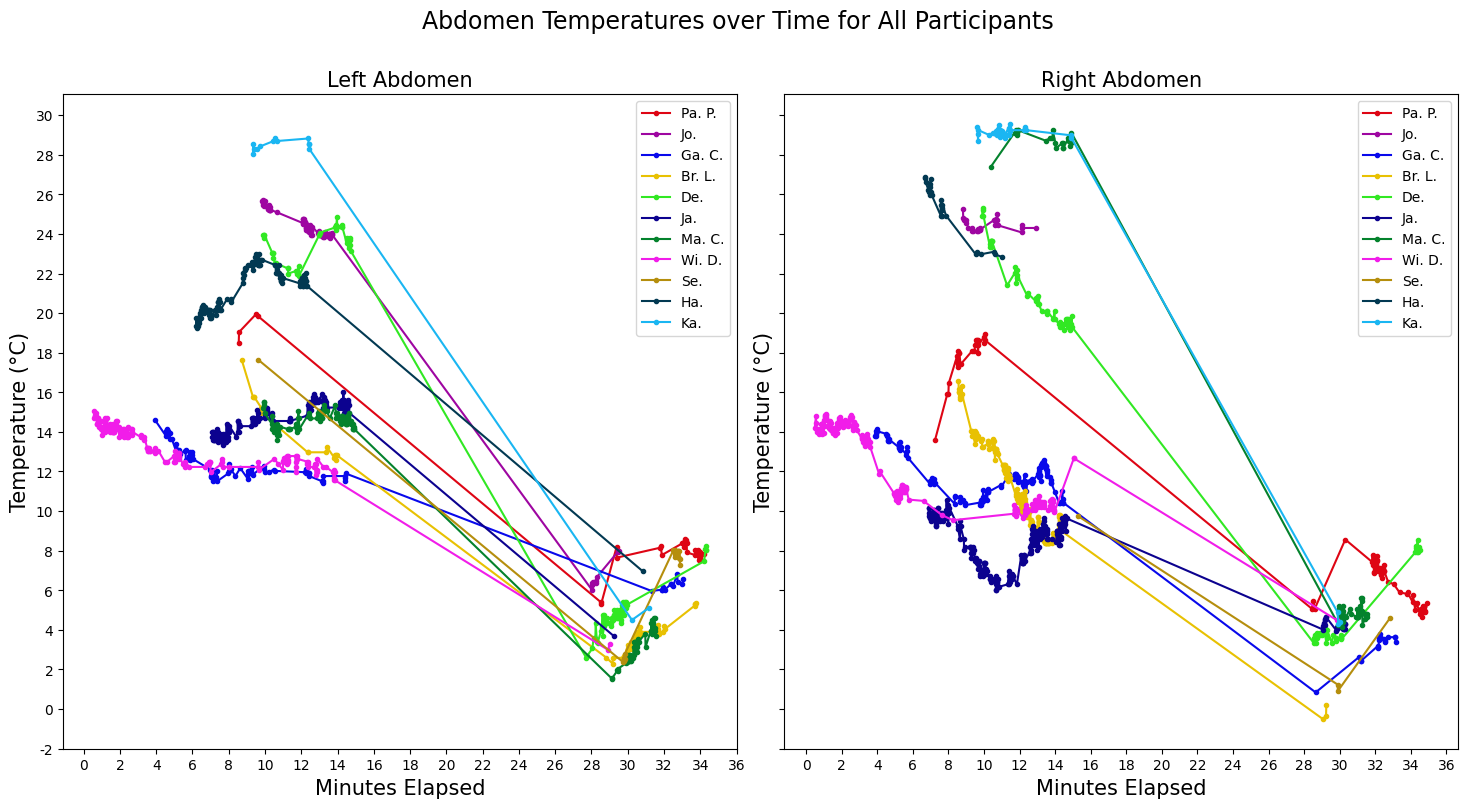

In [115]:
# PLOTTING CODE
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 8.5), sharey=True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax1.plot(d6_xL,  d6_yL,  marker=".", color=person6.Color,  label=person6.Name)
ax1.plot(d14_xL, d14_yL, marker=".", color=person14.Color, label=person14.Name)
ax1.plot(d28_xL, d28_yL, marker=".", color=person28.Color, label=person28.Name)
ax1.plot(d17_xL, d17_yL, marker=".", color=person17.Color, label=person17.Name)
ax1.plot(d2_xL,  d2_yL,  marker=".", color=person2.Color,  label=person2.Name)
ax1.plot(d15_xL, d15_yL, marker=".", color=person15.Color, label=person15.Name)
ax1.plot(d16_xL, d16_yL, marker=".", color=person16.Color, label=person16.Name)
ax1.plot(d13_xL, d13_yL, marker=".", color=person13.Color, label=person13.Name)
ax1.plot(d32_xL, d32_yL, marker=".", color=person32.Color, label=person32.Name)
ax1.plot(d19_xL, d19_yL, marker=".", color=person19.Color, label=person19.Name)
ax1.plot(d26_xL, d26_yL, marker=".", color=person26.Color, label=person26.Name)

ax2.plot(d6_xR,  d6_yR,  marker=".", color=person6.Color,  label=person6.Name)
ax2.plot(d14_xR, d14_yR, marker=".", color=person14.Color, label=person14.Name)
ax2.plot(d28_xR, d28_yR, marker=".", color=person28.Color, label=person28.Name)
ax2.plot(d17_xR, d17_yR, marker=".", color=person17.Color, label=person17.Name)
ax2.plot(d2_xR,  d2_yR,  marker=".", color=person2.Color,  label=person2.Name)
ax2.plot(d15_xR, d15_yR, marker=".", color=person15.Color, label=person15.Name)
ax2.plot(d16_xR, d16_yR, marker=".", color=person16.Color, label=person16.Name)
ax2.plot(d13_xR, d13_yR, marker=".", color=person13.Color, label=person13.Name)
ax2.plot(d32_xR, d32_yR, marker=".", color=person32.Color, label=person32.Name)
ax2.plot(d19_xR, d19_yR, marker=".", color=person19.Color, label=person19.Name)
ax2.plot(d26_xR, d26_yR, marker=".", color=person26.Color, label=person26.Name)


times = [ datetime.datetime(1970, 1, 31, 23, 45, 0) + datetime.timedelta(minutes=2*i) for i in range(19) ]
xticks = [ "0", "2", "4", "6", "8", "10", "12", "14", "16", "18", "20", "22", "24", "26", "28", "30", "32", "34", "36"]

ax1.set_xticks(times, xticks)
ax1.set_yticks(
    [-2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    ["-2,", "0", "2", "4", "6", "8", "10", "12", "14", "16", "18", "20", "22", "24", "26", "28", "30"]
)
ax2.set_xticks(times, xticks)
ax2.set_yticks(
    [-2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    ["-2", "0", "2", "4", "6", "8", "10", "12", "14", "16", "18", "20", "22", "24", "26", "28", "30"]
)

fig.subplots_adjust(wspace=0.07)
fig.suptitle("Abdomen Temperatures over Time for All Participants", fontsize=17)
ax1.set_title("Left Abdomen",  fontsize=15)
ax2.set_title("Right Abdomen", fontsize=15)
ax1.set_ylabel("Temperature (°C)", fontsize=15); ax2.set_ylabel("Temperature (°C)", fontsize=15)
ax1.set_xlabel("Minutes Elapsed",  fontsize=15); ax2.set_xlabel("Minutes Elapsed",  fontsize=15)

# ax1.set_ylim(0.0, 30.0)
# ax2.set_ylim(0.0, 30.0)
ax1.legend()
ax2.legend()